Mounted at /content/drive
🔹 Optimized Model Coefficients:
   a=0.0025644666181137035, b=-0.03493614371585189, c=-0.04127353884137717, d=0.00345352823285046, e=-0.0061559732183537755, f=-0.008261745803226691, g=-0.19779447693538527, h=0.27520738294815983, i=0.8189881069775498, j=12.85834690776129
✅ Optimal Conditions:
   ap_aperturesize = 34.13793103448276
   ap_wd = 10.144
   ap_actualkv = 1.5
   Lowest Score (Best Quality) = 10.182044459118327


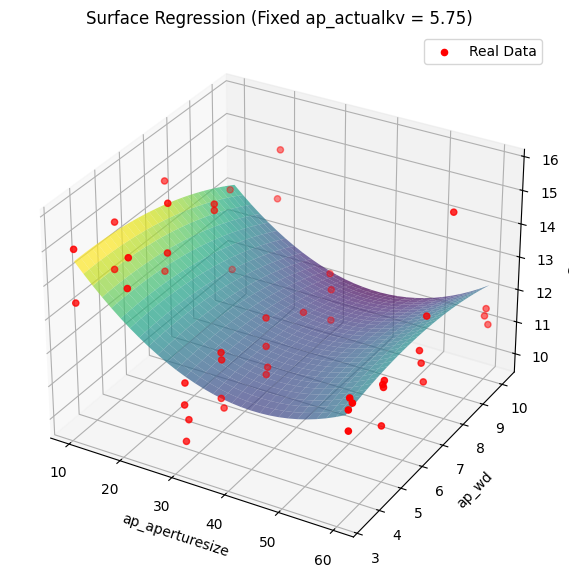

In [1]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/EOD_2_SN/SN/niqe_scores_with_metadata.csv'
# 📌 Step 1: Install & Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from google.colab import drive


# 📌 Step 4: Read Data from CSV
df = pd.read_csv(file_path)

# 📌 Step 5: Extract Variables
x_data = df['ap_aperturesize'].values
y_data = df['ap_wd'].values
z_data = df['ap_actualkv'].values
score_data = df['Score'].values  # Quality metric (Lower is better)

# 📌 Step 6: Define the 3D Surface Regression Model (Second-degree polynomial)
def surface_function(X, a, b, c, d, e, f, g, h, i, j):
    x, y, z = X
    return a*x**2 + b*y**2 + c*z**2 + d*x*y + e*x*z + f*y*z + g*x + h*y + i*z + j

# 📌 Step 7: Perform Surface Fitting
params, _ = curve_fit(surface_function, (x_data, y_data, z_data), score_data)

# Extract coefficients
a, b, c, d, e, f, g, h, i, j = params
print(f'🔹 Optimized Model Coefficients:')
print(f'   a={a}, b={b}, c={c}, d={d}, e={e}, f={f}, g={g}, h={h}, i={i}, j={j}')

# 📌 Step 8: Generate a Fine Mesh Grid for Optimization
x_range = np.linspace(min(x_data), max(x_data), 30)
y_range = np.linspace(min(y_data), max(y_data), 30)
z_range = np.linspace(min(z_data), max(z_data), 30)

X, Y, Z = np.meshgrid(x_range, y_range, z_range)
Scores = surface_function((X, Y, Z), a, b, c, d, e, f, g, h, i, j)

# 📌 Step 9: Find the Optimal Conditions (Minimum Score)
optimal_idx = np.unravel_index(np.argmin(Scores, axis=None), Scores.shape)
optimal_x = X[optimal_idx]
optimal_y = Y[optimal_idx]
optimal_z = Z[optimal_idx]
optimal_score = Scores[optimal_idx]

print(f'✅ Optimal Conditions:')
print(f'   ap_aperturesize = {optimal_x}')
print(f'   ap_wd = {optimal_y}')
print(f'   ap_actualkv = {optimal_z}')
print(f'   Lowest Score (Best Quality) = {optimal_score}')

# 📌 Step 10: 3D Visualization (Fixing One Variable for Plotting)
z_fixed = np.mean(z_data)  # Fix z at its average value
X_plot, Y_plot = np.meshgrid(x_range, y_range)
Z_plot = surface_function((X_plot, Y_plot, np.full_like(X_plot, z_fixed)), a, b, c, d, e, f, g, h, i, j)

# 📌 Step 11: Plot the 3D Surface
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of real data
ax.scatter(x_data, y_data, score_data, color='red', label='Real Data')

# Surface plot of the fitted function
ax.plot_surface(X_plot, Y_plot, Z_plot, cmap='viridis', alpha=0.7)

# Labels and Title
ax.set_xlabel('ap_aperturesize')
ax.set_ylabel('ap_wd')
ax.set_zlabel('Score')
ax.set_title(f'Surface Regression (Fixed ap_actualkv = {z_fixed:.2f})')

plt.legend()
plt.show()
